In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ielts-success-stories-dataset/IELTS_Success_Stories_Dataset.xlsx


In [2]:
import pandas as pd
import numpy as np

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('/kaggle/input/ielts-success-stories-dataset/IELTS_Success_Stories_Dataset.xlsx')
print(data.shape)
data.head(2)

(27, 23)


,Candidate,Location,Profession,Study Duration (months),IELTS Score (Overall),Key Strategies,Education Level,Age,Target Country,English Proficiency (Preparation),...,Preferred Learning Resources,Application Status,Job Offer Received,Additional Certifications,Volunteer Experience,Language Fluency,Internship Experience,Relevant Skills,Recommendations,Networking Efforts
0,Aisha,Karachi,Grad Student,3,8.5,"Practice, forums, tutoring",Master's,24,Canada,Advanced,...,"Online courses, study guides",Under Process,No,TESOL,Yes,"Urdu, English",Research Assistant,"Data Analysis, Teaching",Strong,"LinkedIn, Local Events"
1,Ahmed,Lahore,IT Professional,4,7.5,"Balanced schedule, time management, speaking p...",Bachelor's,29,Australia,Intermediate,...,"Online forums, practice tests",Approved,Yes,PMP,No,"Urdu, English",IT Consultant,"Project Management, Programming",Positive,Online Communities


# **Performing EDA**

In [4]:
print(data.describe())

       Study Duration (months)  IELTS Score (Overall)        Age  \
count                27.000000              27.000000  27.000000   
mean                  3.962963               8.138889  27.592593   
std                   1.255189               0.580465   3.249370   
min                   2.000000               7.000000  22.000000   
25%                   3.000000               7.687500  25.500000   
50%                   4.000000               8.250000  28.000000   
75%                   5.000000               8.500000  30.000000   
max                   6.000000               9.000000  34.000000   

       Practice Hours per Week  Mock Tests Taken  
count                27.000000         27.000000  
mean                 15.111111          5.148148  
std                   3.576992          1.633865  
min                  10.000000          3.000000  
25%                  12.000000          4.000000  
50%                  15.000000          5.000000  
75%                  18.000000

In [6]:
print(data.isnull().sum())

Candidate                            0
Location                             0
Profession                           0
Study Duration (months)              0
IELTS Score (Overall)                0
Key Strategies                       0
Education Level                      0
Age                                  0
Target Country                       0
English Proficiency (Preparation)    0
Practice Hours per Week              0
Mock Tests Taken                     0
Achieved Desired Score               0
Preferred Learning Resources         0
Application Status                   0
Job Offer Received                   0
Additional Certifications            0
Volunteer Experience                 0
Language Fluency                     0
Internship Experience                0
Relevant Skills                      0
Recommendations                      0
Networking Efforts                   0
dtype: int64


# **Unique values in dataframe**

In [9]:
for cols in data.columns:
    print(cols,data[cols].value_counts())

Candidate Candidate
Aisha     2
Ahmed     2
Fatima    2
Ali       2
Saad      2
Nida      2
Bilal     2
Sara      2
Imran     2
Hina      2
Farid     2
Zara      1
Rashid    1
Sana      1
Hasan     1
Zainab    1
Name: count, dtype: int64
Location Location
Lahore       8
Karachi      7
Islamabad    7
Peshawar     5
Name: count, dtype: int64
Profession Profession
IT Professional      4
Grad Student         2
School Teacher       2
Eng. Student         2
Marketing Manager    2
Finance Analyst      2
Medical Student      2
Software Engineer    2
Journalist           2
Civil Engineer       2
Graphic Designer     1
Educator             1
Environmentalist     1
Architect            1
HR Specialist        1
Name: count, dtype: int64
Study Duration (months) Study Duration (months)
3    8
4    7
5    5
6    4
2    3
Name: count, dtype: int64
IELTS Score (Overall) IELTS Score (Overall)
7.500    5
8.250    5
8.500    4
9.000    3
8.000    3
8.750    3
7.875    2
7.000    2
Name: count, dtype: int6

In [10]:
data.drop(columns=['Candidate', 'Language Fluency'], axis=1, inplace=True)
data.head(2)

,Location,Profession,Study Duration (months),IELTS Score (Overall),Key Strategies,Education Level,Age,Target Country,English Proficiency (Preparation),Practice Hours per Week,...,Achieved Desired Score,Preferred Learning Resources,Application Status,Job Offer Received,Additional Certifications,Volunteer Experience,Internship Experience,Relevant Skills,Recommendations,Networking Efforts
0,Karachi,Grad Student,3,8.5,"Practice, forums, tutoring",Master's,24,Canada,Advanced,15,...,Yes,"Online courses, study guides",Under Process,No,TESOL,Yes,Research Assistant,"Data Analysis, Teaching",Strong,"LinkedIn, Local Events"
1,Lahore,IT Professional,4,7.5,"Balanced schedule, time management, speaking p...",Bachelor's,29,Australia,Intermediate,10,...,Yes,"Online forums, practice tests",Approved,Yes,PMP,No,IT Consultant,"Project Management, Programming",Positive,Online Communities


# **Using label encoder to convert numerical features to categorical**

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
colstoencode=["Location","Profession","Study Duration (months)","Key Strategies","Target Country","English Proficiency (Preparation)","Achieved Desired Score","Preferred Learning Resources","Application Status","Job Offer Received","Additional Certifications","Volunteer Experience","Internship Experience","Relevant Skills","Recommendations","Networking Efforts"]

label_encoder = LabelEncoder()
for col in colstoencode:
    data[col] = label_encoder.fit_transform(data[col])

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Location                           27 non-null     int64  
 1   Profession                         27 non-null     int64  
 2   Study Duration (months)            27 non-null     int64  
 3   IELTS Score (Overall)              27 non-null     float64
 4   Key Strategies                     27 non-null     int64  
 5   Education Level                    27 non-null     object 
 6   Age                                27 non-null     int64  
 7   Target Country                     27 non-null     int64  
 8   English Proficiency (Preparation)  27 non-null     int64  
 9   Practice Hours per Week            27 non-null     int64  
 10  Mock Tests Taken                   27 non-null     int64  
 11  Achieved Desired Score             27 non-null     int64  
 

In [15]:
data["Education Level"] = label_encoder.fit_transform(data["Education Level"])

In [16]:
data.describe()

,Location,Profession,Study Duration (months),IELTS Score (Overall),Key Strategies,Education Level,Age,Target Country,English Proficiency (Preparation),Practice Hours per Week,...,Achieved Desired Score,Preferred Learning Resources,Application Status,Job Offer Received,Additional Certifications,Volunteer Experience,Internship Experience,Relevant Skills,Recommendations,Networking Efforts
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1.407407,7.666667,1.962963,8.138889,6.777778,0.518519,27.592593,6.666667,0.333333,15.111111,...,0.740741,8.259259,1.666667,0.074074,7.111111,0.518519,7.148148,7.629630,0.888889,8.259259
std,1.083416,4.260733,1.255189,0.580465,4.576977,0.509175,3.249370,4.242641,0.480384,3.576992,...,0.446576,4.604284,1.208941,0.266880,4.585373,0.509175,3.707619,4.170853,0.640513,4.604284
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,22.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,4.500000,1.000000,7.687500,3.000000,0.000000,25.500000,3.000000,0.000000,12.000000,...,0.500000,4.500000,1.000000,0.000000,3.500000,0.000000,4.500000,4.500000,0.500000,4.500000
50%,1.000000,9.000000,2.000000,8.250000,6.000000,1.000000,28.000000,7.000000,0.000000,15.000000,...,1.000000,9.000000,2.000000,0.000000,7.000000,1.000000,8.000000,8.000000,1.000000,9.000000
75%,2.000000,11.000000,3.000000,8.500000,10.500000,1.000000,30.000000,10.500000,1.000000,18.000000,...,1.000000,12.000000,3.000000,0.000000,10.500000,1.000000,10.000000,11.000000,1.000000,12.000000
max,3.000000,14.000000,4.000000,9.000000,15.000000,1.000000,34.000000,13.000000,1.000000,20.000000,...,1.000000,15.000000,3.000000,1.000000,15.000000,1.000000,12.000000,14.000000,2.000000,15.000000


# **Correlation**

In [17]:
target = 'IELTS Score (Overall)'
correlation = data.corr(method='pearson')
correlation[target].sort_values(ascending=False)

IELTS Score (Overall)                1.000000
Practice Hours per Week              0.872168
Mock Tests Taken                     0.839244
Volunteer Experience                 0.788021
Achieved Desired Score               0.700651
Recommendations                      0.534483
Application Status                   0.328849
Profession                           0.108859
Internship Experience                0.106235
Additional Certifications            0.091518
Key Strategies                       0.026541
Preferred Learning Resources        -0.031980
Education Level                     -0.090369
Location                            -0.093436
Age                                 -0.101392
Networking Efforts                  -0.111130
Relevant Skills                     -0.172544
Study Duration (months)             -0.190626
Target Country                      -0.195220
Job Offer Received                  -0.317241
English Proficiency (Preparation)   -0.827586
Name: IELTS Score (Overall), dtype

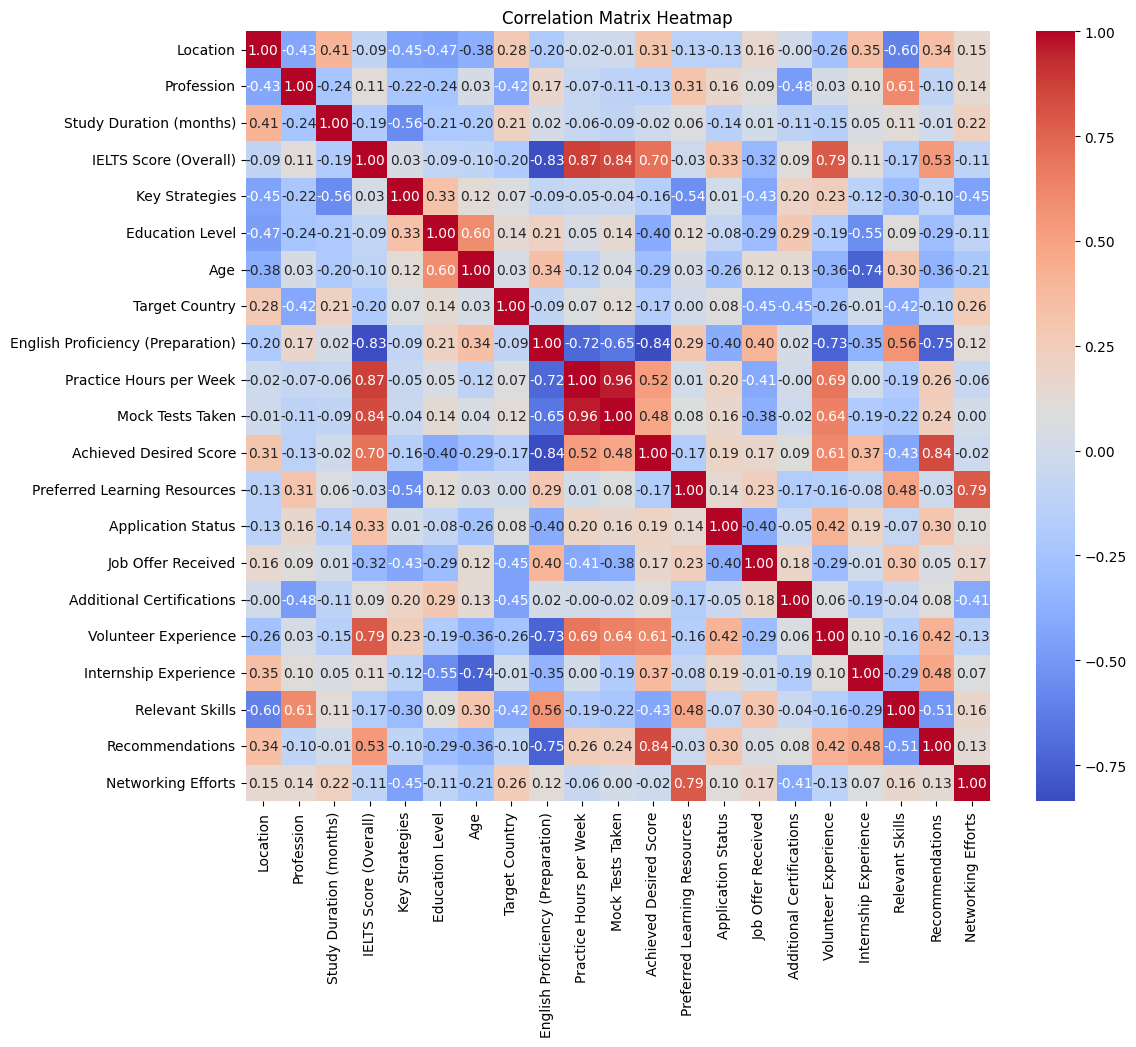

In [20]:
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')

plt.savefig('correlation_heatmap.png')
plt.show()

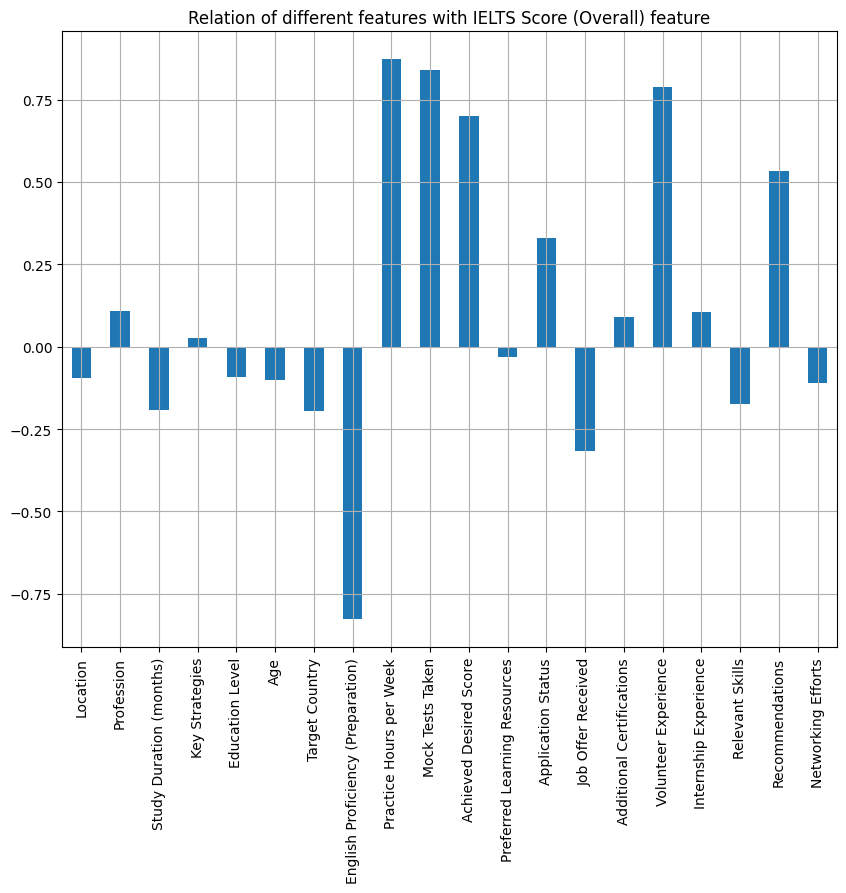

In [21]:
data2 = data.drop(columns=[target], axis=1)
data2.corrwith(data[target]).plot.bar(figsize=(10, 8), title=f'Relation of different features with {target} feature', rot=90, grid=True)
plt.savefig('target_correlation.png')
plt.show()

## Visualize the different features correspond to target variable

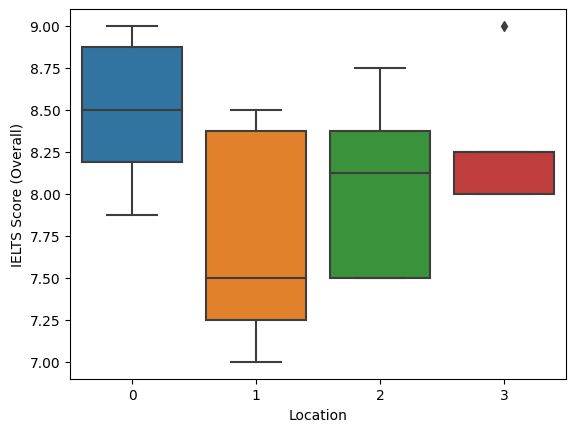

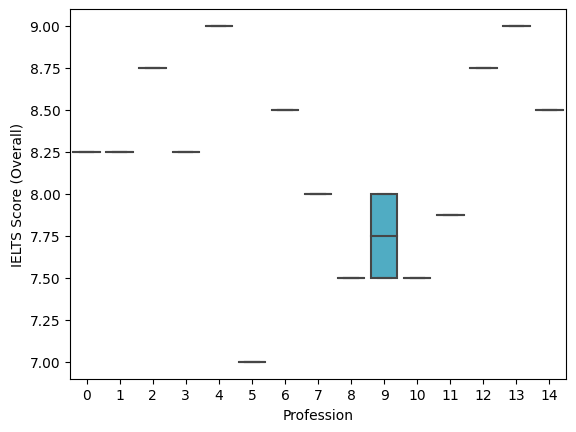

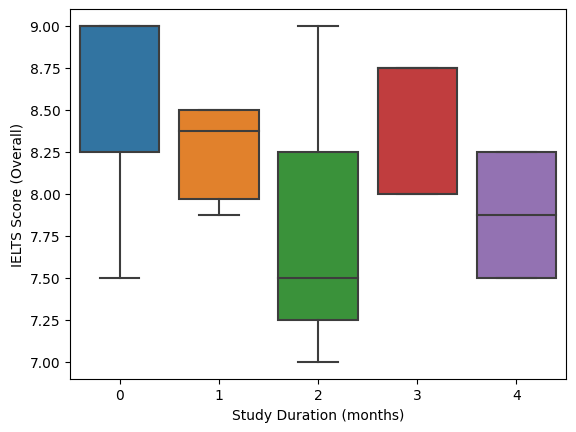

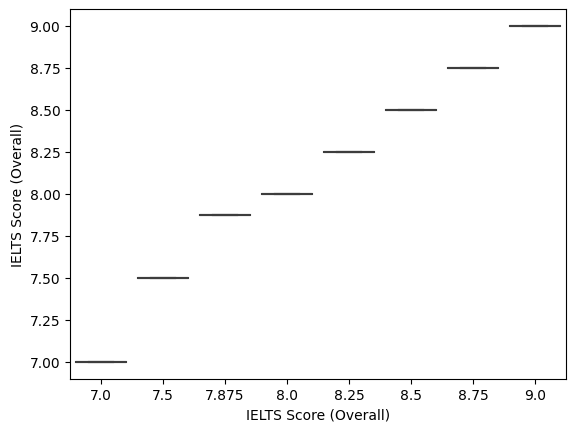

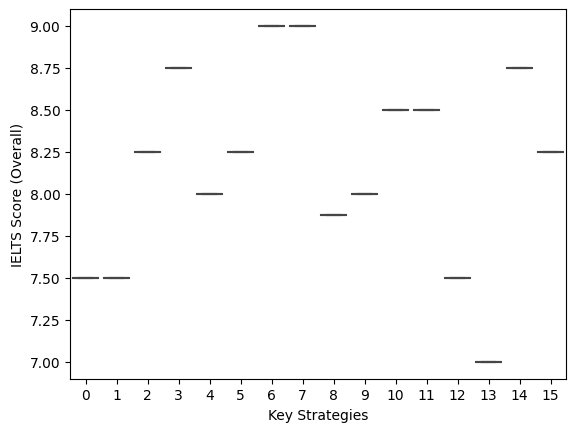

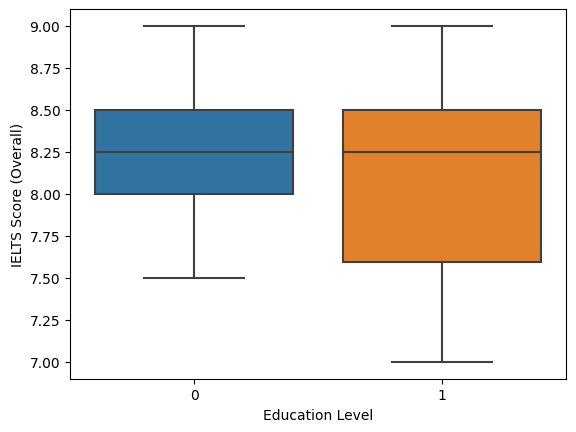

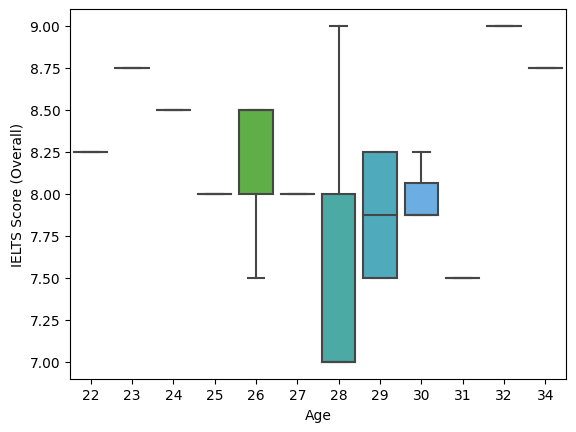

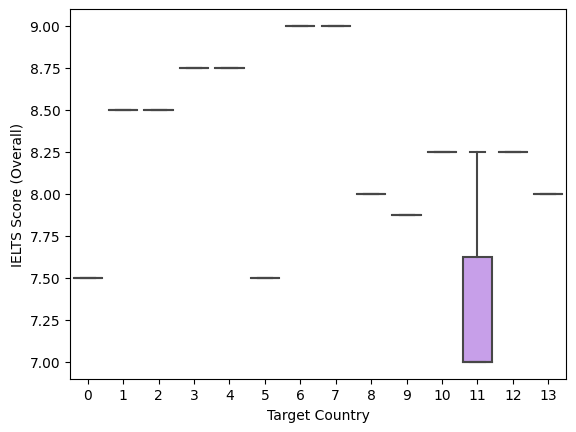

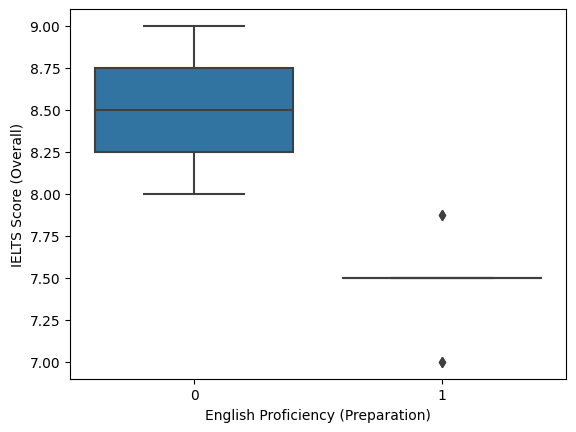

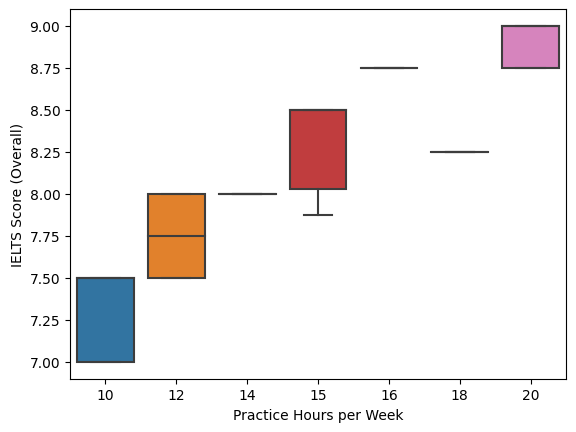

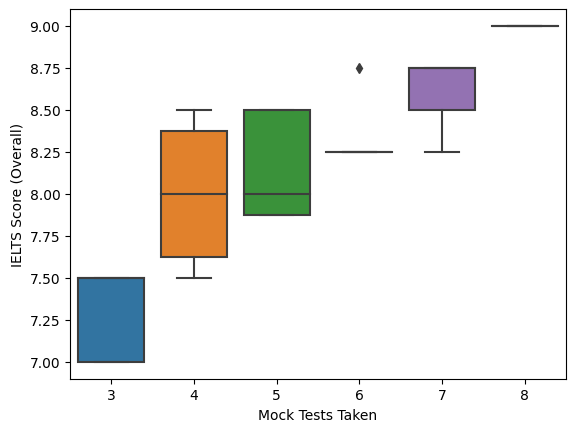

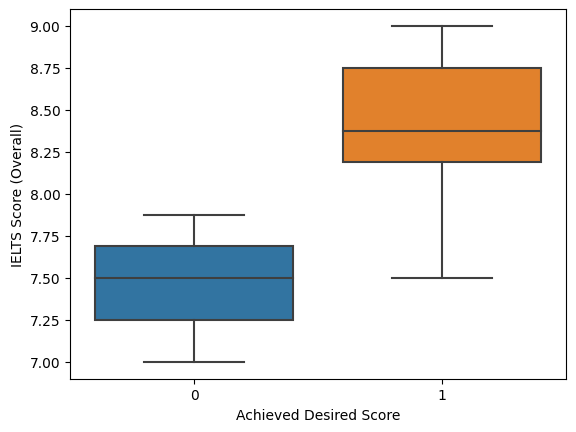

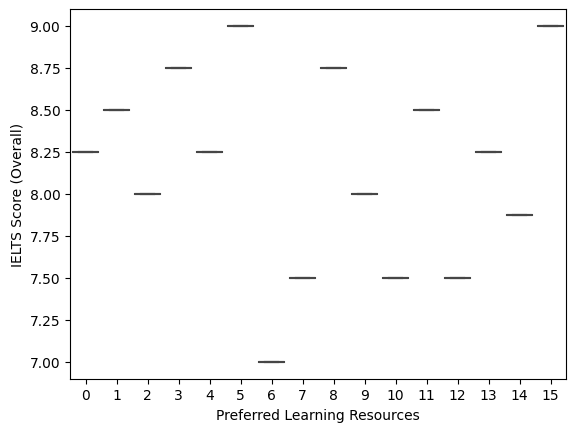

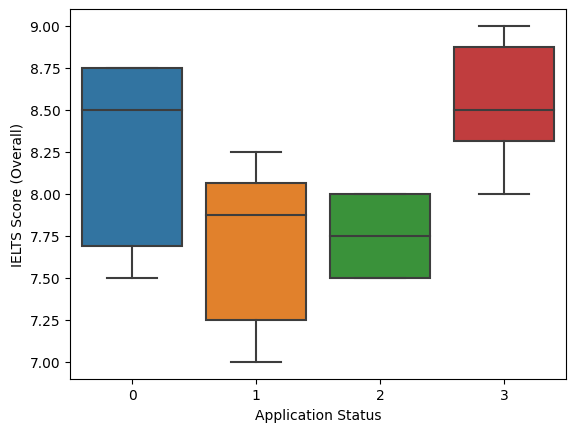

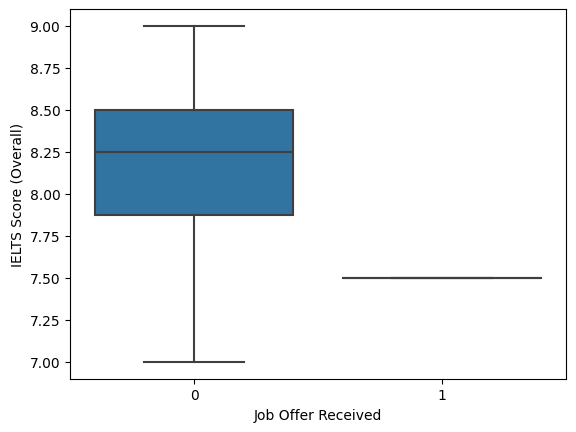

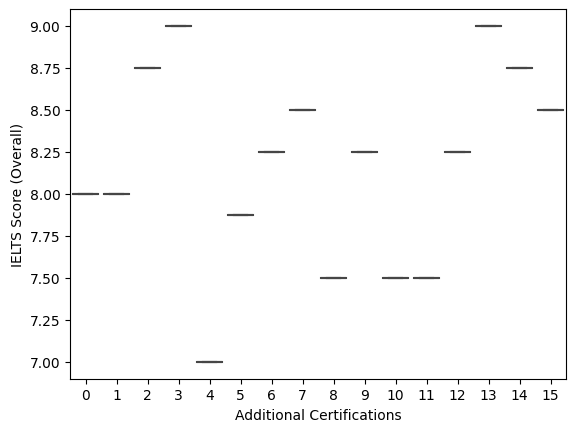

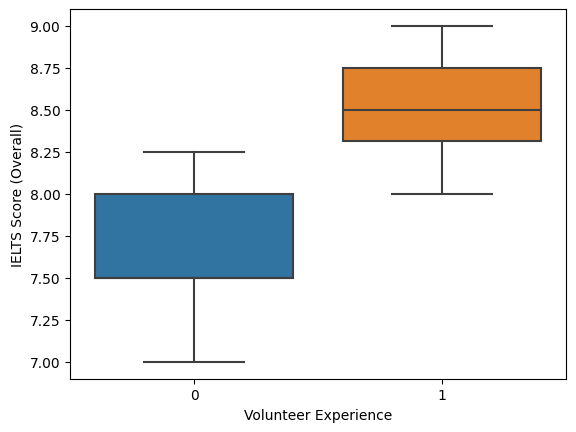

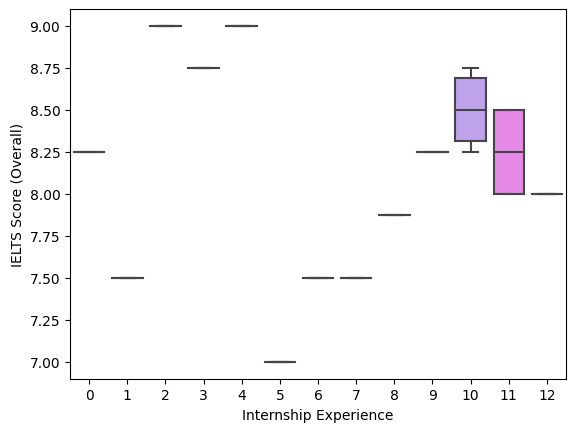

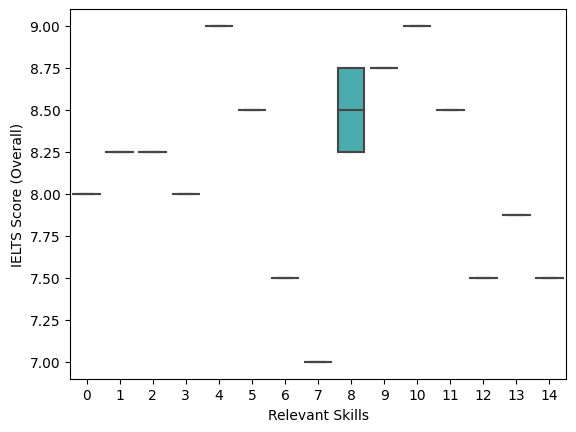

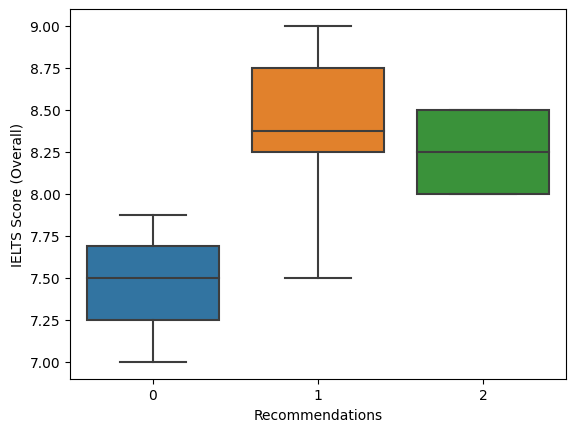

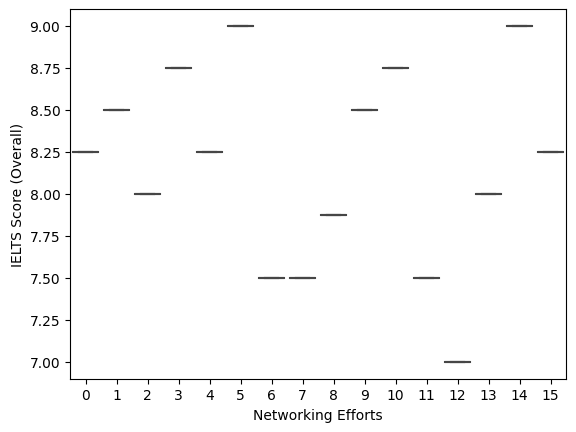

In [22]:
def plot(col):
    sns.boxplot(x=col, y=target, data=data)
    plt.savefig(f'{col}_feature.png')
    plt.show()

for col in data.columns:
    plot(col)

# **Training of model**

In [23]:
x = data.drop(columns=[target], axis=1)
y = data[target]

print(x.shape)
print(y.shape)

(27, 20)
(27,)


In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

print('Training set:', xtrain.shape, ytrain.shape)
print('Testing set:', xtest.shape, ytest.shape)

Training set: (21, 20) (21,)
Testing set: (6, 20) (6,)


In [25]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor


In [27]:
from sklearn.metrics import mean_squared_error, r2_score
results = pd.DataFrame(columns=['Model', 'MSE_train', 'R2_train', 'MSE_test', 'R2_test'])


# **Linear Regression**

In [29]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Linear Regression', mse_train, r2_train, mse_test, r2_test]

# **Ridge Regression**

In [30]:
ridge = Ridge()
ridge.fit(xtrain, ytrain)
ypred_train = ridge.predict(xtrain)
ypred_test = ridge.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Ridge Regression', mse_train, r2_train, mse_test, r2_test]


# **Elasticnet Regression**

In [31]:
elastic = ElasticNet()
elastic.fit(xtrain, ytrain)
ypred_train = elastic.predict(xtrain)
ypred_test = elastic.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Elastic Net Regression', mse_train, r2_train, mse_test, r2_test]


# **Decision Tree Regressor**

In [32]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)
ypred_train = dtr.predict(xtrain)
ypred_test = dtr.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Decision Tree Regression', mse_train, r2_train, mse_test, r2_test]


# **Random Forest Regressor**

In [33]:
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)
ypred_train = rfr.predict(xtrain)
ypred_test = rfr.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Random Forest Regression', mse_train, r2_train, mse_test, r2_test]


# **XGB Regressor**

In [41]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)
ypred_train = xgb.predict(xtrain)
ypred_test = xgb.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['XG Boost Regression without tuning', mse_train, r2_train, mse_test, r2_test]


# **KNeighborsRegressor**

In [35]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain, ytrain)
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['KNN Regression', mse_train, r2_train, mse_test, r2_test]


# **Hyperparameter tuning using GridSearchCv**

In [37]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
random_forest_params = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=random_forest_params,
                           cv=5, n_jobs=-1, verbose=1)

grid_search.fit(xtrain, ytrain)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
ypred_train = best_model.predict(xtrain)
ypred_test = best_model.predict(xtest)
mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)
mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Random Forest Regression with tuning', mse_train, r2_train, mse_test, r2_test]

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


In [45]:
import xgboost as xg 
xgboost_params = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
}
xgb_r = xg.XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_r, param_grid=xgboost_params,
                           cv=5, n_jobs=-1, verbose=1)

grid_search.fit(xtrain, ytrain)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
ypred_train = best_model.predict(xtrain)
ypred_test = best_model.predict(xtest)
mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)
mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['XGboost Regression with tuning', mse_train, r2_train, mse_test, r2_test]

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [47]:
gradient_boosting_params = {
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [1,2,3, 5, 8],
}

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

grid_search = GridSearchCV(estimator=gb, param_grid=gradient_boosting_params,
                           cv=5, n_jobs=-1, verbose=1)
grid_search.fit(xtrain, ytrain)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
ypred_train = best_model.predict(xtrain)
ypred_test = best_model.predict(xtest)
mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)
mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['GradeientBoosting Regression with tuning', mse_train, r2_train, mse_test, r2_test]

Fitting 5 folds for each of 140 candidates, totalling 700 fits


# **Best model**

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gb2 = GradientBoostingRegressor(learning_rate=0.15, max_depth=2, n_estimators=50)
gb2.fit(xtrain, ytrain)
ypred_train = gb2.predict(xtrain)
ypred_test = gb2.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)
print(mse_train, r2_train, mse_test, r2_test)
results.loc[len(results)] = ['GradientBoosting Regression with tuning', mse_train, r2_train, mse_test, r2_test]

1.459224994222663e-06 0.999995691026759 6.67641421304407e-05 0.9996713149925885


# **Result Table**

In [58]:
results = results.sort_values(by='MSE_test', ascending=True)
results


,Model,MSE_train,R2_train,MSE_test,R2_test
0,GradientBoosting Regression with tuning,1.459225e-06,0.999996,0.000067,0.999671
1,XGboost Regression with tuning,1.842974e-07,0.999999,0.006423,0.968378
2,Random Forest Regression with tuning,6.955859e-03,0.979460,0.012847,0.936753
3,XG Boost Regression,1.422946e-07,1.000000,0.016455,0.918990
4,XG Boost Regression without tuning,1.422946e-07,1.000000,0.016455,0.918990
5,Decision Tree Regression,0.000000e+00,1.000000,0.020833,0.897436
6,Random Forest Regression,1.066101e-02,0.968519,0.023450,0.884554
7,Ridge Regression,6.444433e-04,0.998097,0.072341,0.643857
8,Elastic Net Regression,9.246131e-02,0.726969,0.133491,0.342813
9,Linear Regression,2.554407e-30,1.000000,0.154003,0.241830
